In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import itertools

In [2]:
train_dataset = np.array(pd.read_csv(r'C:\Users\aman\Desktop\Classification of Handwritten Digits\mnist_train.csv'))
test_dataset = np.array(pd.read_csv(r'C:\Users\aman\Desktop\Classification of Handwritten Digits\mnist_test.csv'))

In [3]:
X_train = train_dataset[:, 1:]
Y_train = train_dataset[:, 0]
X_test = test_dataset[:, 1:]
Y_test = test_dataset[:, 0]

#normalizing X
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
model = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer1"),
        layers.Dense(10, activation="softmax", name="layer2"),
    ]
)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [5]:
history = model.fit(X_train, Y_train, batch_size=32, epochs = 10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2637 - accuracy: 0.9307 - val_loss: 0.1902 - val_accuracy: 0.9563
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1167 - accuracy: 0.9688 - val_loss: 0.1491 - val_accuracy: 0.9645
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0790 - accuracy: 0.9791 - val_loss: 0.1498 - val_accuracy: 0.9672
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0600 - accuracy: 0.9835 - val_loss: 0.1617 - val_accuracy: 0.9661
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0535 - accuracy: 0.9858 - val_loss: 0.1930 - val_accuracy: 0.9697
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0375 - accuracy: 0.9890 - val_loss: 0.1720 - val_accuracy: 0.9695
Epoch 7/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0344 - accuracy: 0.9910 - val_loss: 0.2088 - val_ac

In [6]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print(train_acc)
print(val_acc)

[0.9306874871253967, 0.968833327293396, 0.9791041612625122, 0.9834583401679993, 0.9857500195503235, 0.989020824432373, 0.9909791946411133, 0.9917083382606506, 0.9921249747276306, 0.9921666383743286]
[0.956333339214325, 0.9645000100135803, 0.9672499895095825, 0.9660833477973938, 0.9696666598320007, 0.9695000052452087, 0.969083309173584, 0.9691666960716248, 0.9694166779518127, 0.9698333144187927]


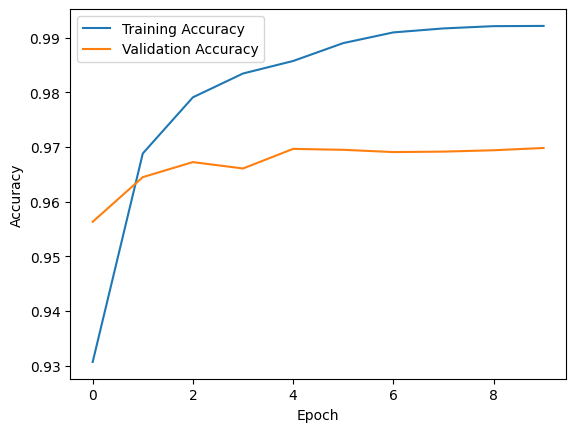

In [7]:
# Plot the training and validation accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Accuracy of model = ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2358 - accuracy: 0.9727
Accuracy of model =  0.9726999998092651


In [9]:
Y_pred = model.predict(X_test)
# print(Y_pred)

# Convert Y_test to one-hot encoded format
Y_test_onehot = tf.keras.utils.to_categorical(Y_test)

# Reshape Y_test
Y_test_onehot = Y_test_onehot.reshape(-1, 10)

# Convert the class probabilities to class labels
Y_pred_labels = np.argmax(Y_pred, axis=1)
Y_true_labels = np.argmax(Y_test_onehot, axis=1)

labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_true_labels, Y_pred_labels)

# Print the confusion matrix
print(conf_matrix)

313/313 [==============================] - 1s 4ms/step
[[ 961    0    2    2    1    0    6    1    7    0]
 [   0 1110    3    2    1    0    5    6    6    2]
 [   3    0  998    3    4    1   10    4    9    0]
 [   1    0    6  985    2    4    1    5    3    3]
 [   2    0    7    1  952    0    3    4    3   10]
 [   2    1    1   18    1  848    5    2   10    4]
 [   2    2    1    1    2    2  943    0    5    0]
 [   0    3    6    2    2    1    1 1007    1    5]
 [   0    1    2    6    4    3    2    8  946    2]
 [   2    2    1    6    7    2    1   10    1  977]]


In [10]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 961    0    2    2    1    0    6    1    7    0]
 [   0 1110    3    2    1    0    5    6    6    2]
 [   3    0  998    3    4    1   10    4    9    0]
 [   1    0    6  985    2    4    1    5    3    3]
 [   2    0    7    1  952    0    3    4    3   10]
 [   2    1    1   18    1  848    5    2   10    4]
 [   2    2    1    1    2    2  943    0    5    0]
 [   0    3    6    2    2    1    1 1007    1    5]
 [   0    1    2    6    4    3    2    8  946    2]
 [   2    2    1    6    7    2    1   10    1  977]]


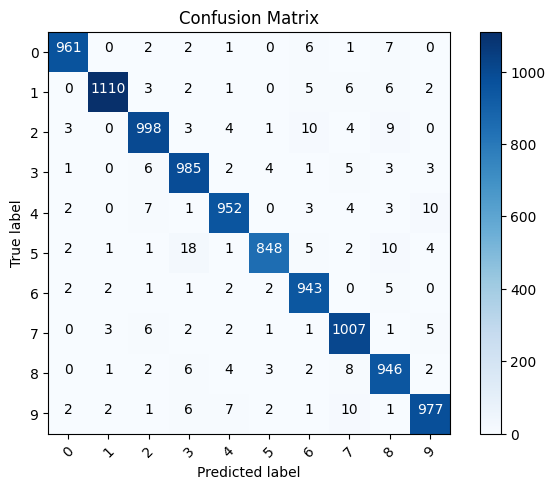

In [11]:
plot_confusion_matrix(conf_matrix, labels, title='Confusion Matrix')